In [3]:
## imported needed 
import numpy

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
from IPython.display import clear_output

In [6]:
## just shows if GPU acceleration is avaialble... need CUDA compatible GPU. check tf website for compatibility
## for tensorflow 2.0 just pip install tensorflow... otherwise use tensorflow-gpu

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [7]:
## load images that will be used for training and testing
imgDirec = './train_homography.npy'

# load the data into a numpy array
X_data = np.load(imgDirec)

print('Number of images: ' + str(len(X_data)))
X_data.shape

Number of images: 20399


(20399, 72, 96)

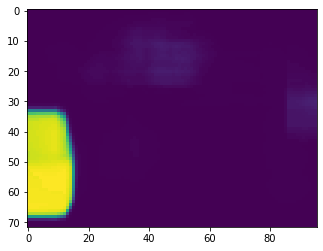

In [8]:
X_data = X_data / 255
img = plt.imshow(X_data[0])


In [9]:
## load output (speed data) that will be used for trianing and testing
spdDirec = './train.txt'
file = open(spdDirec, 'r')
y_data = []
count = 0
for line in file:
    if count == len(X_data):
        break
    y_data.append(float(line))
    count += 1
    
print('Number of speeds imported: ' + str(len(y_data)))
y_data = np.array(y_data)

Number of speeds imported: 20399


Speed: 0.764541


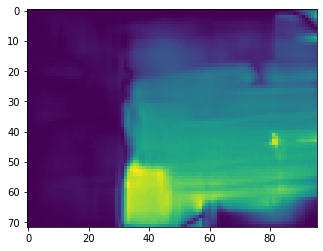

In [10]:
## get train and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)
print("Speed: " + str(y_train[0]))
img = plt.imshow(X_train[0])

In [11]:
## create a sequential model using keras
# layers for the model
s = np.array(X_train.shape)
finalSize = int(max(y_data)) + 1
input_shape = (s[1], s[2], 1)

layers = [
            Conv2D(32, activation="relu",  input_shape=input_shape, kernel_size=3),
            Conv2D(64, activation="relu",  padding ='same', kernel_size=3),
            MaxPool2D((2,2)),
            Conv2D(128, activation="relu",  padding ='same', kernel_size=3),
            Conv2D(128, activation="relu",  padding ='same', kernel_size=3),
            MaxPool2D((2,2)),
            Conv2D(256, activation="relu",  padding ='same', kernel_size=3),
            Conv2D(256, activation="relu",  padding ='same', kernel_size=3),
            MaxPool2D((2,2)),
            Flatten(),
            Dropout(0.2),
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(128, activation='relu'),
            Dropout(0.2),
            Dense(1)
         ]

# construct the model
model = Sequential(layers)

# train the model and show summary
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(X_train.reshape(-1, s[1], s[2] ,1), y_train, epochs=35, batch_size=10)
model.summary()

Epoch 1/35
1632/1632 [==============================] - 22s 13ms/step - loss: 29.1258 - mean_squared_error: 29.1258
Epoch 2/35
1632/1632 [==============================] - 22s 13ms/step - loss: 20.9268 - mean_squared_error: 20.9268
Epoch 3/35
1632/1632 [==============================] - 22s 14ms/step - loss: 17.0652 - mean_squared_error: 17.0652
Epoch 4/35
1632/1632 [==============================] - 22s 14ms/step - loss: 13.6790 - mean_squared_error: 13.6790
Epoch 5/35
1632/1632 [==============================] - 23s 14ms/step - loss: 11.3849 - mean_squared_error: 11.3849
Epoch 6/35
1632/1632 [==============================] - 23s 14ms/step - loss: 10.1953 - mean_squared_error: 10.1953
Epoch 7/35
1632/1632 [==============================] - 23s 14ms/step - loss: 9.4130 - mean_squared_error: 9.4130
Epoch 8/35
1632/1632 [==============================] - 23s 14ms/step - loss: 7.9403 - mean_squared_error: 7.9403
Epoch 9/35
1632/1632 [==============================] - 23s 14ms/step - loss

In [13]:
## evaluate the model
scores = model.evaluate(X_test.reshape(-1, s[1], s[2] ,1), y_test)

128/128 [==============================] - 2s 12ms/step - loss: 5.6706 - mean_squared_error: 5.6706


In [15]:
model.save('cnn_20epoch')

INFO:tensorflow:Assets written to: cnn_20epoch/assets


In [19]:
# save the model to disk
# serialize model to JSON
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
importedModel = model_from_json(loaded_model_json)
# load weights into new model
importedModel.load_weights("model.h5")
print("Loaded model from disk")
importedModel.summary()

In [31]:
import cv2

print("Estimated value:  Actual value:")
for i in range(0, 100):
  print(importedModel.predict(X_test[i].reshape(-1, 72, 96 ,1)),"    ",y_test[i])


Estimated value:  Actual value:
[[21.114616]]      25.418693
[[22.827507]]      23.798889
[[21.3947]]      23.945837
[[9.56452]]      7.848229
[[19.446854]]      21.19189
[[4.2933483]]      1.661847
[[19.642363]]      21.67592
[[8.493808]]      8.881263
[[9.1413765]]      9.327785
[[20.395744]]      22.796638
[[19.24757]]      21.745117
[[14.0466175]]      18.634625
[[7.8959417]]      6.317187
[[3.9267423]]      5.041238
[[6.4920397]]      6.267151
[[20.398489]]      24.615454
[[1.7589467]]      1.873015
[[20.641254]]      25.054747
[[2.4949982]]      2.326663
[[7.800795]]      7.420984
[[4.052718]]      2.625963
[[5.7246966]]      6.424878
[[7.6585293]]      7.549004
[[18.351128]]      14.557082
[[1.6586118]]      0.0
[[17.764385]]      22.24689
[[1.4981346]]      0.0
[[9.757156]]      9.13455
[[18.68993]]      21.990503
[[17.06067]]      22.098872
[[19.998951]]      24.633293
[[21.000305]]      26.059682
[[8.852972]]      7.609576
[[4.26097]]      4.370715
[[7.0671673]]      6.668428